In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

23.052939735191416 -121.25169811341402
13.83407116284799 -91.77340945683699
-35.31156778759236 134.34081041169617
-12.600482113392886 -125.89190807761435
80.65668774255758 -33.759665334316225
-66.11637106379443 -172.7169845291683
54.438759554678114 -70.0035534543703
72.42152836006 -33.32531877028754
-16.38352621189142 174.42632384858643
-54.41258361007094 -89.42719237119054
37.1223401610459 117.82959140613514
-45.56324496024446 -174.72977775826396
68.56705144767625 -75.88700648412163
-12.674223325138883 -65.58756143360051
44.57704751403355 127.3207809015654
15.934075272996012 -169.72510693076603
3.2413266484232537 -167.47002835962968
-72.01956368608701 -31.56201150284852
33.76399867093403 139.5887512962767
-27.075423304540315 44.56257578786983
7.0436125622535 59.60188850875937
-79.52195411227008 -116.64436620884689
52.39117118692994 166.47074718482196
-4.535640617831433 1.8924601163597004
-78.9262888587224 30.84759432896277
-32.69062817161114 116.1474504990706
59.85268309182254 47.8673

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guerrero negro
Processing Record 2 of Set 1 | champerico
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | tasiilaq
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | port-cartier
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | zhoucun
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | rodrigues alves
Processing Record 13 of Set 1 | shanhetun
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | saleaula
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | shimoda
Processing Record 18 of Set 1 | beloha
Processing Record 19 of Set 1 | bandarbeyla
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | port-gentil
Processing Record 22 of Set 1 | por

Processing Record 36 of Set 4 | yeltsovka
City not found. Skipping...
Processing Record 37 of Set 4 | vanimo
Processing Record 38 of Set 4 | port blair
Processing Record 39 of Set 4 | tarskoye
Processing Record 40 of Set 4 | butaritari
Processing Record 41 of Set 4 | leningradskiy
Processing Record 42 of Set 4 | santarem
Processing Record 43 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 4 | chuy
Processing Record 45 of Set 4 | aloleng
Processing Record 46 of Set 4 | catamarca
Processing Record 47 of Set 4 | qaanaaq
Processing Record 48 of Set 4 | coihaique
Processing Record 49 of Set 4 | marica
Processing Record 50 of Set 4 | watsa
Processing Record 1 of Set 5 | honiara
Processing Record 2 of Set 5 | nanortalik
Processing Record 3 of Set 5 | urgut
Processing Record 4 of Set 5 | ararat
Processing Record 5 of Set 5 | labuhan
Processing Record 6 of Set 5 | yellowknife
Processing Record 7 of Set 5 | monroe
Processing Record 8 of Set 5 | saint-joseph
Processing

Processing Record 25 of Set 8 | provideniya
Processing Record 26 of Set 8 | xingyi
Processing Record 27 of Set 8 | luanda
Processing Record 28 of Set 8 | jeremie
Processing Record 29 of Set 8 | aviles
Processing Record 30 of Set 8 | rindal
Processing Record 31 of Set 8 | verkhoyansk
Processing Record 32 of Set 8 | pangnirtung
Processing Record 33 of Set 8 | lolua
City not found. Skipping...
Processing Record 34 of Set 8 | ewa beach
Processing Record 35 of Set 8 | esperance
Processing Record 36 of Set 8 | belaya gora
Processing Record 37 of Set 8 | hofn
Processing Record 38 of Set 8 | altamont
Processing Record 39 of Set 8 | mardin
Processing Record 40 of Set 8 | tabialan
City not found. Skipping...
Processing Record 41 of Set 8 | cibakhaza
Processing Record 42 of Set 8 | ust-charyshskaya pristan
Processing Record 43 of Set 8 | saint-augustin
Processing Record 44 of Set 8 | strezhevoy
Processing Record 45 of Set 8 | diffa
Processing Record 46 of Set 8 | itoman
Processing Record 47 of Se

Processing Record 11 of Set 12 | magalia
Processing Record 12 of Set 12 | turayf
Processing Record 13 of Set 12 | tabou
Processing Record 14 of Set 12 | tahta
Processing Record 15 of Set 12 | oskarshamn
Processing Record 16 of Set 12 | novovasylivka
Processing Record 17 of Set 12 | jaffna
Processing Record 18 of Set 12 | kribi
Processing Record 19 of Set 12 | boden
Processing Record 20 of Set 12 | diapaga
Processing Record 21 of Set 12 | kuche
City not found. Skipping...
Processing Record 22 of Set 12 | kilindoni
Processing Record 23 of Set 12 | umm jarr
City not found. Skipping...
Processing Record 24 of Set 12 | kathu
Processing Record 25 of Set 12 | springfield
Processing Record 26 of Set 12 | harpanahalli
Processing Record 27 of Set 12 | nioro
Processing Record 28 of Set 12 | tarcau
Processing Record 29 of Set 12 | san joaquin
Processing Record 30 of Set 12 | mglin
Processing Record 31 of Set 12 | margate
Processing Record 32 of Set 12 | ostrovnoy
Processing Record 33 of Set 12 | d

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guerrero Negro,27.9769,-114.0611,75.07,59,4,17.36,MX,2022-07-14 22:11:07
1,Champerico,14.3000,-91.9167,83.62,75,91,8.72,GT,2022-07-14 22:11:07
2,Port Lincoln,-34.7333,135.8667,50.16,63,68,12.86,AU,2022-07-14 22:06:42
3,Atuona,-9.8000,-139.0333,77.58,70,8,14.58,PF,2022-07-14 22:07:29
4,Tasiilaq,65.6145,-37.6368,48.36,71,100,7.31,GL,2022-07-14 22:09:55
5,Vaini,-21.2000,-175.2000,80.76,89,20,10.36,TO,2022-07-14 22:11:08
6,Port-Cartier,50.0334,-66.8654,62.74,61,95,8.48,CA,2022-07-14 22:10:20
7,Isangel,-19.5500,169.2667,76.93,78,10,6.08,VU,2022-07-14 22:11:08
8,Punta Arenas,-53.1500,-70.9167,32.11,93,75,2.30,CL,2022-07-14 22:07:44
9,Zhoucun,36.8167,117.8167,78.76,81,92,1.14,CN,2022-07-14 22:11:09


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

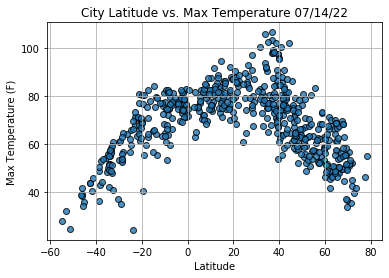

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

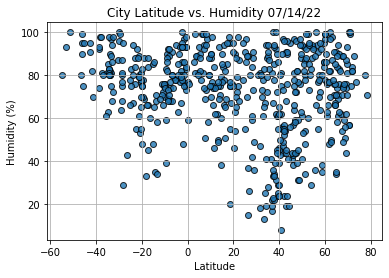

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

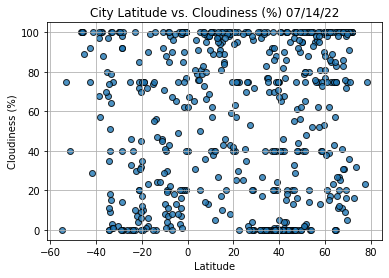

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

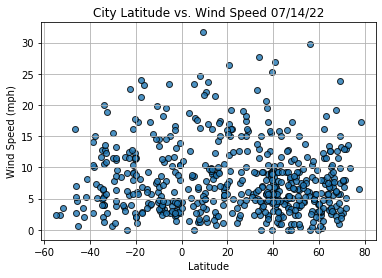

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Lat                       22.0752
Lng                      -159.319
Max Temp                    84.18
Humidity                       75
Cloudiness                    100
Wind Speed                  16.11
Country                        US
Date          2022-07-14 22:11:10
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

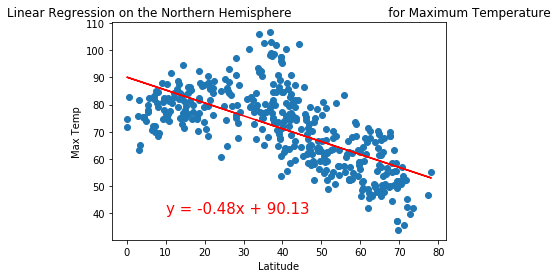

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

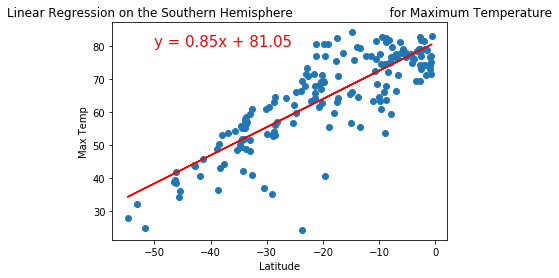

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

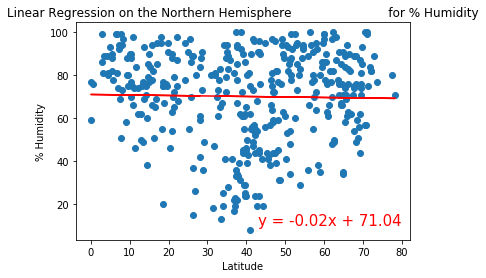

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(43,10))

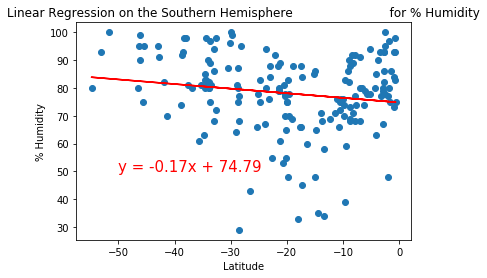

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,50))

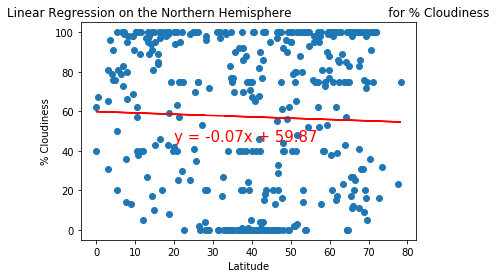

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,45))

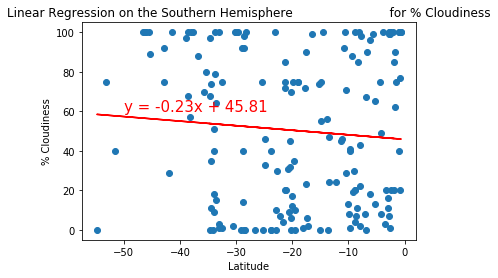

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

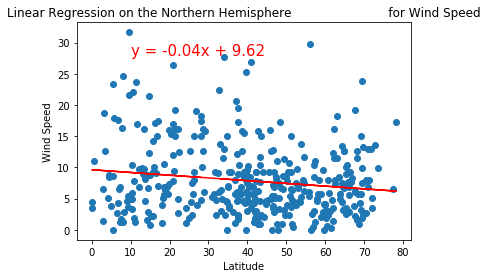

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,28))

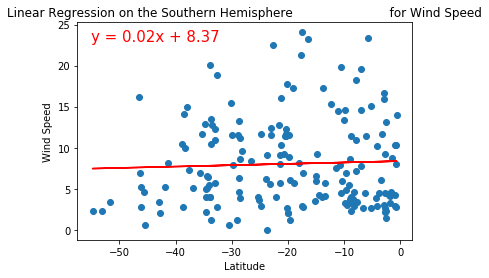

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,23))